In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.models import Sequential,Input,Model
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [30]:
PATH_TRAIN=r'F:\All data\colourisation\Dataset\Train'
PATH_TEST=r'F:\All data\colourisation\Dataset\Test'
BASE=r'F:\All data\colourisation\Dataset'

In [3]:
X =[]

for img in os.listdir(PATH_TRAIN):
    p=os.path.join(PATH_TRAIN,img)
    img=load_img(p,target_size=(256,256 ))
    img=img_to_array(img)
    print(img)
    X.append(img/255.0)
X = np.array(X)

print(X.shape)

[[[184. 185. 189.]
  [185. 186. 190.]
  [185. 186. 190.]
  ...
  [221. 221. 223.]
  [221. 221. 223.]
  [221. 221. 223.]]

 [[184. 185. 189.]
  [185. 186. 190.]
  [185. 186. 190.]
  ...
  [221. 221. 223.]
  [221. 221. 223.]
  [221. 221. 223.]]

 [[185. 186. 190.]
  [185. 186. 190.]
  [185. 186. 190.]
  ...
  [221. 221. 223.]
  [221. 221. 223.]
  [221. 221. 223.]]

 ...

 [[ 49.  53.  52.]
  [ 48.  53.  49.]
  [ 48.  52.  51.]
  ...
  [116. 115. 110.]
  [114. 113. 109.]
  [113. 112. 108.]]

 [[ 48.  50.  47.]
  [ 48.  50.  45.]
  [ 48.  50.  47.]
  ...
  [116. 115. 110.]
  [114. 113. 108.]
  [113. 112. 107.]]

 [[ 48.  50.  45.]
  [ 49.  51.  46.]
  [ 49.  51.  46.]
  ...
  [122. 122. 114.]
  [122. 121. 116.]
  [120. 119. 114.]]]
[[[139. 154. 151.]
  [144. 159. 156.]
  [149. 164. 161.]
  ...
  [ 72.  95.  87.]
  [ 68.  91.  83.]
  [ 67.  93.  84.]]

 [[142. 157. 154.]
  [146. 161. 158.]
  [150. 165. 162.]
  ...
  [ 64.  85.  78.]
  [ 64.  87.  79.]
  [ 68.  91.  83.]]

 [[146. 161. 158.]

[[[175. 169. 171.]
  [175. 169. 171.]
  [175. 169. 171.]
  ...
  [193. 193. 193.]
  [193. 193. 191.]
  [193. 193. 191.]]

 [[175. 169. 171.]
  [175. 169. 171.]
  [175. 169. 171.]
  ...
  [193. 193. 193.]
  [194. 193. 191.]
  [193. 193. 191.]]

 [[175. 169. 171.]
  [175. 169. 171.]
  [175. 169. 171.]
  ...
  [194. 193. 191.]
  [196. 192. 191.]
  [194. 193. 191.]]

 ...

 [[105.  77.  66.]
  [102.  74.  63.]
  [ 95.  67.  56.]
  ...
  [124.  88.  72.]
  [127.  91.  75.]
  [130.  94.  78.]]

 [[103.  75.  64.]
  [ 99.  71.  60.]
  [ 93.  65.  54.]
  ...
  [124.  88.  72.]
  [127.  91.  75.]
  [130.  94.  78.]]

 [[101.  73.  62.]
  [ 97.  69.  58.]
  [ 91.  63.  52.]
  ...
  [124.  88.  72.]
  [128.  92.  76.]
  [130.  94.  78.]]]
[[[ 66.  65.  73.]
  [ 66.  65.  71.]
  [ 66.  65.  71.]
  ...
  [ 77.  82. 104.]
  [ 65.  57.  70.]
  [ 59.  46.  53.]]

 [[ 69.  68.  76.]
  [ 69.  68.  74.]
  [ 70.  69.  75.]
  ...
  [ 77.  82. 104.]
  [ 65.  57.  70.]
  [ 58.  45.  52.]]

 [[ 72.  73.  78.]

  [ 1. 10. 15.]]]
[[[99. 86. 77.]
  [99. 86. 77.]
  [98. 85. 76.]
  ...
  [83. 73. 63.]
  [82. 72. 62.]
  [82. 72. 62.]]

 [[99. 86. 77.]
  [99. 86. 77.]
  [99. 86. 77.]
  ...
  [83. 73. 63.]
  [82. 72. 62.]
  [82. 72. 62.]]

 [[97. 87. 77.]
  [97. 87. 77.]
  [97. 87. 77.]
  ...
  [83. 73. 63.]
  [83. 73. 63.]
  [82. 72. 62.]]

 ...

 [[18. 18. 26.]
  [18. 18. 26.]
  [19. 19. 29.]
  ...
  [59. 57. 68.]
  [63. 62. 60.]
  [62. 59. 52.]]

 [[18. 18. 26.]
  [18. 18. 26.]
  [18. 18. 26.]
  ...
  [56. 54. 65.]
  [61. 60. 58.]
  [59. 59. 51.]]

 [[18. 18. 26.]
  [18. 18. 26.]
  [18. 18. 26.]
  ...
  [53. 53. 65.]
  [59. 58. 56.]
  [57. 57. 49.]]]
[[[ 43.  27.  38.]
  [ 72.  56.  67.]
  [ 66.  49.  59.]
  ...
  [213. 195. 175.]
  [213. 195. 175.]
  [213. 195. 175.]]

 [[ 46.  30.  41.]
  [ 73.  57.  68.]
  [ 72.  55.  65.]
  ...
  [213. 195. 175.]
  [213. 195. 175.]
  [213. 195. 175.]]

 [[ 46.  30.  41.]
  [ 67.  51.  62.]
  [ 71.  53.  65.]
  ...
  [212. 194. 172.]
  [212. 194. 172.]
  [212.

[[[186. 185. 181.]
  [186. 185. 181.]
  [186. 185. 181.]
  ...
  [182. 190. 193.]
  [181. 189. 192.]
  [181. 189. 192.]]

 [[185. 181. 178.]
  [186. 182. 179.]
  [186. 182. 179.]
  ...
  [173. 181. 184.]
  [172. 180. 183.]
  [172. 180. 183.]]

 [[182. 177. 173.]
  [183. 178. 174.]
  [183. 178. 174.]
  ...
  [161. 168. 174.]
  [161. 168. 174.]
  [161. 168. 174.]]

 ...

 [[143. 114.  96.]
  [129. 101.  80.]
  [128.  96.  73.]
  ...
  [207. 209. 206.]
  [207. 209. 206.]
  [207. 209. 206.]]

 [[146. 111.  89.]
  [131.  97.  72.]
  [129.  95.  70.]
  ...
  [207. 209. 206.]
  [207. 209. 206.]
  [207. 209. 206.]]

 [[147. 110.  84.]
  [131.  94.  68.]
  [130.  94.  68.]
  ...
  [207. 209. 206.]
  [207. 209. 206.]
  [207. 209. 206.]]]
[[[ 56.  44.  58.]
  [ 67.  50.  66.]
  [ 92.  63.  85.]
  ...
  [ 56.  95. 100.]
  [ 56.  86.  94.]
  [ 57.  84.  93.]]

 [[ 52.  44.  57.]
  [ 60.  49.  63.]
  [ 75.  56.  75.]
  ...
  [ 50.  85.  89.]
  [ 47.  76.  82.]
  [ 49.  74.  81.]]

 [[ 49.  52.  61.]

  [128. 118. 109.]]]
[[[ 38.  40.  37.]
  [ 38.  40.  37.]
  [ 38.  40.  37.]
  ...
  [ 46.  51.  47.]
  [112. 118. 114.]
  [103. 109. 105.]]

 [[ 38.  40.  37.]
  [ 38.  40.  37.]
  [ 38.  40.  37.]
  ...
  [ 36.  41.  37.]
  [ 41.  47.  43.]
  [ 46.  52.  48.]]

 [[ 36.  40.  39.]
  [ 36.  40.  39.]
  [ 36.  40.  39.]
  ...
  [ 38.  43.  39.]
  [ 34.  40.  36.]
  [ 41.  47.  43.]]

 ...

 [[ 35.  37.  34.]
  [ 31.  33.  30.]
  [ 25.  27.  24.]
  ...
  [ 53.  53.  51.]
  [ 54.  54.  52.]
  [ 54.  54.  52.]]

 [[ 35.  37.  34.]
  [ 32.  34.  31.]
  [ 22.  24.  21.]
  ...
  [ 54.  54.  52.]
  [ 54.  54.  52.]
  [ 55.  55.  53.]]

 [[ 36.  38.  35.]
  [ 32.  34.  31.]
  [ 19.  21.  18.]
  ...
  [ 54.  54.  52.]
  [ 55.  55.  53.]
  [ 56.  56.  54.]]]
[[[18. 28. 27.]
  [18. 28. 27.]
  [18. 28. 27.]
  ...
  [21. 31. 32.]
  [21. 31. 32.]
  [21. 31. 32.]]

 [[18. 28. 27.]
  [18. 28. 27.]
  [18. 28. 27.]
  ...
  [21. 31. 32.]
  [21. 31. 32.]
  [21. 31. 32.]]

 [[18. 28. 27.]
  [18. 28. 27.]
 

[[[216. 208. 205.]
  [216. 208. 205.]
  [216. 208. 205.]
  ...
  [249. 241. 238.]
  [249. 241. 238.]
  [249. 241. 238.]]

 [[217. 209. 206.]
  [217. 209. 206.]
  [217. 209. 206.]
  ...
  [247. 239. 236.]
  [248. 240. 237.]
  [248. 240. 237.]]

 [[217. 209. 206.]
  [217. 209. 206.]
  [217. 209. 206.]
  ...
  [246. 238. 235.]
  [246. 238. 235.]
  [246. 238. 235.]]

 ...

 [[131. 126. 122.]
  [129. 124. 120.]
  [125. 120. 116.]
  ...
  [116.  94.  71.]
  [116.  94.  71.]
  [116.  94.  71.]]

 [[132. 127. 124.]
  [128. 123. 120.]
  [123. 118. 114.]
  ...
  [113.  91.  68.]
  [112.  90.  67.]
  [112.  90.  67.]]

 [[133. 128. 125.]
  [130. 125. 122.]
  [127. 122. 118.]
  ...
  [110.  88.  65.]
  [109.  87.  64.]
  [108.  86.  63.]]]
[[[ 86.  79.  51.]
  [ 84.  77.  51.]
  [ 82.  76.  54.]
  ...
  [235. 232. 197.]
  [245. 238. 209.]
  [252. 242. 215.]]

 [[ 87.  80.  52.]
  [ 86.  79.  53.]
  [ 85.  77.  56.]
  ...
  [239. 236. 201.]
  [243. 237. 205.]
  [249. 240. 211.]]

 [[ 91.  82.  53.]

  [ 25.  30.  26.]]]
[[[220. 198. 187.]
  [220. 198. 187.]
  [220. 198. 187.]
  ...
  [229. 209. 198.]
  [229. 209. 198.]
  [228. 208. 197.]]

 [[220. 198. 187.]
  [220. 198. 187.]
  [220. 198. 187.]
  ...
  [229. 209. 198.]
  [228. 208. 197.]
  [228. 208. 197.]]

 [[220. 198. 187.]
  [220. 198. 187.]
  [221. 199. 188.]
  ...
  [228. 208. 197.]
  [228. 208. 197.]
  [227. 207. 196.]]

 ...

 [[193. 176. 158.]
  [193. 176. 158.]
  [193. 176. 158.]
  ...
  [208. 193. 174.]
  [208. 193. 174.]
  [208. 193. 174.]]

 [[194. 177. 159.]
  [194. 177. 159.]
  [194. 177. 159.]
  ...
  [208. 193. 174.]
  [208. 193. 172.]
  [208. 193. 172.]]

 [[194. 177. 159.]
  [194. 177. 159.]
  [194. 177. 159.]
  ...
  [208. 193. 174.]
  [208. 193. 172.]
  [208. 193. 172.]]]
[[[186. 136. 129.]
  [188. 138. 131.]
  [188. 138. 131.]
  ...
  [186. 137. 132.]
  [186. 137. 132.]
  [186. 137. 132.]]

 [[186. 136. 129.]
  [188. 138. 131.]
  [188. 138. 131.]
  ...
  [186. 137. 132.]
  [187. 138. 133.]
  [187. 138. 133.]

  [190. 194. 195.]]]
[[[ 37.  31.  15.]
  [ 28.  21.   3.]
  [ 71.  58.  42.]
  ...
  [ 18.  24.  12.]
  [ 17.  23.  13.]
  [ 15.  21.  11.]]

 [[ 34.  25.  10.]
  [ 34.  22.   6.]
  [ 65.  49.  33.]
  ...
  [ 18.  24.  12.]
  [ 17.  23.  13.]
  [ 16.  22.  12.]]

 [[ 48.  32.  17.]
  [ 46.  29.  13.]
  [ 59.  38.  21.]
  ...
  [ 21.  24.  15.]
  [ 19.  22.  13.]
  [ 18.  21.  12.]]

 ...

 [[212. 182. 146.]
  [212. 182. 146.]
  [213. 183. 147.]
  ...
  [ 88.  97. 114.]
  [121. 128. 146.]
  [209. 216. 234.]]

 [[215. 186. 152.]
  [215. 186. 152.]
  [216. 187. 153.]
  ...
  [ 64.  77.  93.]
  [ 94. 103. 118.]
  [194. 204. 216.]]

 [[218. 189. 157.]
  [218. 189. 157.]
  [219. 190. 158.]
  ...
  [ 89. 105. 120.]
  [111. 123. 135.]
  [197. 207. 217.]]]
[[[188. 179. 200.]
  [187. 178. 199.]
  [183. 175. 198.]
  ...
  [204. 204. 214.]
  [206. 206. 216.]
  [207. 207. 217.]]

 [[179. 170. 189.]
  [177. 170. 188.]
  [175. 167. 188.]
  ...
  [203. 203. 213.]
  [204. 204. 214.]
  [205. 205. 215.]

[[[230. 237. 229.]
  [228. 235. 227.]
  [228. 234. 230.]
  ...
  [238. 161.  45.]
  [242. 171.  17.]
  [248. 181.   6.]]

 [[230. 236. 224.]
  [231. 237. 225.]
  [232. 238. 226.]
  ...
  [245. 168.  38.]
  [247. 178.  13.]
  [249. 185.   2.]]

 [[225. 230. 208.]
  [229. 234. 211.]
  [233. 237. 212.]
  ...
  [252. 178.  17.]
  [254. 190.   5.]
  [254. 194.   0.]]

 ...

 [[221. 147. 118.]
  [222. 148. 113.]
  [215. 138.  92.]
  ...
  [215. 178. 149.]
  [217. 174. 155.]
  [220. 174. 159.]]

 [[217. 135.  98.]
  [216. 134.  87.]
  [211. 125.  64.]
  ...
  [215. 173. 149.]
  [214. 174. 149.]
  [218. 178. 152.]]

 [[204. 119.  78.]
  [207. 121.  70.]
  [213. 122.  52.]
  ...
  [213. 171. 149.]
  [213. 174. 145.]
  [216. 180. 148.]]]
[[[127. 148. 141.]
  [129. 150. 143.]
  [131. 152. 145.]
  ...
  [175. 187. 187.]
  [175. 187. 187.]
  [175. 187. 187.]]

 [[129. 150. 143.]
  [131. 152. 145.]
  [133. 154. 147.]
  ...
  [174. 186. 186.]
  [175. 187. 187.]
  [175. 187. 187.]]

 [[133. 154. 147.]

  [ 62.  48.  47.]]]
[[[200. 198. 211.]
  [201. 199. 212.]
  [204. 202. 213.]
  ...
  [ 96. 108. 104.]
  [ 80.  94.  94.]
  [ 62.  76.  76.]]

 [[201. 199. 212.]
  [202. 200. 213.]
  [204. 202. 213.]
  ...
  [ 99. 111. 107.]
  [ 81.  95.  95.]
  [ 62.  76.  76.]]

 [[203. 201. 214.]
  [203. 201. 214.]
  [205. 203. 214.]
  ...
  [102. 114. 110.]
  [ 84.  98.  98.]
  [ 64.  78.  78.]]

 ...

 [[101.  83.  83.]
  [ 99.  79.  80.]
  [ 98.  76.  78.]
  ...
  [169. 152. 145.]
  [168. 159. 150.]
  [170. 166. 155.]]

 [[ 86.  72.  72.]
  [ 85.  69.  70.]
  [ 87.  68.  70.]
  ...
  [171. 156. 149.]
  [170. 163. 155.]
  [167. 164. 155.]]

 [[ 75.  63.  63.]
  [ 76.  62.  62.]
  [ 79.  63.  64.]
  ...
  [172. 157. 150.]
  [168. 163. 157.]
  [161. 161. 153.]]]
[[[179. 173. 173.]
  [183. 171. 173.]
  [175. 152. 158.]
  ...
  [ 45.  52.  62.]
  [ 45.  52.  62.]
  [ 45.  52.  62.]]

 [[179. 173. 173.]
  [183. 171. 173.]
  [174. 151. 157.]
  ...
  [ 45.  52.  62.]
  [ 45.  52.  62.]
  [ 45.  52.  62.]

  [205. 201. 137.]]]
[[[214. 215. 210.]
  [214. 215. 210.]
  [215. 216. 211.]
  ...
  [233. 233. 233.]
  [233. 233. 233.]
  [233. 233. 233.]]

 [[215. 216. 211.]
  [215. 216. 211.]
  [216. 217. 212.]
  ...
  [233. 233. 233.]
  [233. 233. 233.]
  [233. 233. 233.]]

 [[216. 217. 212.]
  [217. 218. 213.]
  [217. 218. 213.]
  ...
  [233. 233. 233.]
  [233. 233. 233.]
  [233. 233. 233.]]

 ...

 [[190. 184. 186.]
  [182. 176. 178.]
  [174. 168. 170.]
  ...
  [152. 151. 159.]
  [150. 149. 157.]
  [146. 145. 153.]]

 [[185. 179. 181.]
  [174. 168. 170.]
  [165. 159. 161.]
  ...
  [148. 147. 155.]
  [149. 147. 158.]
  [148. 146. 157.]]

 [[176. 170. 172.]
  [164. 158. 160.]
  [155. 149. 151.]
  ...
  [145. 144. 152.]
  [148. 146. 157.]
  [151. 149. 160.]]]
[[[ 95. 114. 129.]
  [ 93. 112. 127.]
  [ 88. 110. 124.]
  ...
  [ 58.  67.  72.]
  [ 56.  65.  70.]
  [ 56.  65.  70.]]

 [[ 94. 113. 128.]
  [ 91. 110. 125.]
  [ 86. 108. 122.]
  ...
  [ 58.  67.  72.]
  [ 57.  66.  71.]
  [ 57.  66.  71.]

  [ 42.  39.  34.]]]
[[[39. 45. 43.]
  [40. 46. 44.]
  [42. 48. 46.]
  ...
  [27. 36. 33.]
  [28. 32. 31.]
  [29. 31. 30.]]

 [[40. 46. 44.]
  [41. 47. 45.]
  [43. 49. 47.]
  ...
  [27. 36. 33.]
  [28. 32. 31.]
  [30. 32. 31.]]

 [[42. 48. 48.]
  [43. 49. 49.]
  [44. 50. 50.]
  ...
  [28. 34. 32.]
  [30. 32. 31.]
  [31. 31. 31.]]

 ...

 [[10. 70. 45.]
  [ 5. 69. 43.]
  [ 0. 70. 44.]
  ...
  [43. 38. 32.]
  [41. 36. 32.]
  [39. 34. 30.]]

 [[ 5. 76. 42.]
  [ 3. 77. 42.]
  [ 0. 77. 43.]
  ...
  [44. 40. 31.]
  [44. 37. 31.]
  [43. 36. 30.]]

 [[ 3. 81. 42.]
  [ 1. 81. 42.]
  [ 1. 81. 44.]
  ...
  [44. 40. 31.]
  [45. 38. 32.]
  [44. 37. 31.]]]
[[[210. 188. 190.]
  [215. 195. 196.]
  [224. 204. 205.]
  ...
  [252. 252. 252.]
  [252. 252. 252.]
  [252. 252. 252.]]

 [[232. 212. 213.]
  [236. 218. 218.]
  [242. 226. 226.]
  ...
  [252. 252. 252.]
  [252. 252. 252.]
  [252. 252. 252.]]

 [[245. 231. 231.]
  [249. 235. 235.]
  [252. 241. 239.]
  ...
  [252. 252. 252.]
  [252. 252. 252.]
  [2

  [241.  53. 138.]]]
[[[252. 175.  45.]
  [250. 173.  43.]
  [243. 168.  40.]
  ...
  [ 46.  38.  36.]
  [ 46.  38.  36.]
  [ 46.  38.  36.]]

 [[247. 170.  38.]
  [243. 169.  38.]
  [238. 163.  35.]
  ...
  [ 47.  39.  37.]
  [ 47.  39.  37.]
  [ 47.  39.  37.]]

 [[235. 161.  26.]
  [233. 159.  26.]
  [225. 154.  26.]
  ...
  [ 48.  40.  38.]
  [ 48.  40.  38.]
  [ 48.  40.  38.]]

 ...

 [[ 49.  31.  27.]
  [ 45.  30.  27.]
  [ 42.  28.  27.]
  ...
  [ 93.  67.  52.]
  [ 63.  39.  29.]
  [ 54.  31.  25.]]

 [[ 47.  32.  29.]
  [ 43.  29.  26.]
  [ 39.  28.  26.]
  ...
  [104.  77.  60.]
  [ 73.  49.  37.]
  [ 54.  31.  23.]]

 [[ 47.  32.  29.]
  [ 43.  29.  26.]
  [ 39.  28.  26.]
  ...
  [ 98.  71.  52.]
  [ 78.  54.  42.]
  [ 59.  36.  28.]]]
[[[131. 128. 135.]
  [132. 129. 136.]
  [132. 129. 136.]
  ...
  [137. 134. 141.]
  [137. 134. 141.]
  [136. 133. 140.]]

 [[132. 129. 136.]
  [132. 129. 136.]
  [132. 129. 136.]
  ...
  [137. 134. 141.]
  [137. 134. 141.]
  [137. 134. 141.]

[[[219. 159. 171.]
  [218. 158. 170.]
  [206. 145. 161.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[227. 167. 179.]
  [221. 161. 173.]
  [205. 144. 160.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[231. 171. 183.]
  [221. 161. 173.]
  [201. 140. 156.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 ...

 [[220. 160. 172.]
  [237. 177. 189.]
  [243. 185. 197.]
  ...
  [254. 213. 231.]
  [254. 217. 234.]
  [254. 220. 237.]]

 [[230. 170. 182.]
  [244. 184. 196.]
  [245. 187. 199.]
  ...
  [255. 215. 235.]
  [255. 217. 238.]
  [255. 218. 239.]]

 [[236. 176. 188.]
  [248. 188. 200.]
  [246. 188. 200.]
  ...
  [255. 214. 234.]
  [255. 216. 240.]
  [255. 217. 241.]]]
[[[159. 212. 230.]
  [160. 213. 231.]
  [160. 213. 231.]
  ...
  [100. 186. 219.]
  [ 99. 185. 218.]
  [ 99. 185. 218.]]

 [[160. 213. 231.]
  [160. 213. 231.]
  [160. 213. 231.]
  ...
  [100. 186. 219.]
  [ 99. 185. 218.]
  [ 99. 185. 218.]]

 [[160. 213. 231.]

  [ 22.  28.  28.]]]
[[[198. 199. 201.]
  [196. 197. 199.]
  [187. 189. 188.]
  ...
  [106.  97.  88.]
  [103.  96.  88.]
  [110. 103.  95.]]

 [[194. 195. 197.]
  [193. 194. 196.]
  [185. 187. 186.]
  ...
  [109. 100.  91.]
  [105.  96.  89.]
  [110. 103.  95.]]

 [[188. 190. 189.]
  [191. 193. 192.]
  [183. 185. 184.]
  ...
  [113. 105.  94.]
  [107.  98.  89.]
  [110. 101.  92.]]

 ...

 [[ 96.  65.  47.]
  [ 98.  69.  51.]
  [102.  73.  55.]
  ...
  [ 95.  78.  68.]
  [ 95.  78.  68.]
  [ 92.  75.  65.]]

 [[ 89.  64.  42.]
  [ 91.  66.  44.]
  [ 97.  72.  52.]
  ...
  [ 89.  72.  62.]
  [ 89.  72.  62.]
  [ 89.  72.  62.]]

 [[100.  80.  55.]
  [ 99.  79.  54.]
  [113.  88.  68.]
  ...
  [ 84.  67.  57.]
  [ 84.  67.  57.]
  [ 86.  69.  59.]]]
[[[ 82. 126. 111.]
  [ 83. 127. 112.]
  [ 84. 128. 113.]
  ...
  [130. 172. 152.]
  [131. 170. 151.]
  [131. 170. 151.]]

 [[ 82. 126. 111.]
  [ 83. 127. 112.]
  [ 84. 128. 113.]
  ...
  [129. 171. 151.]
  [131. 170. 151.]
  [130. 169. 150.]

  [ 14.  11.  18.]]]
[[[131. 131. 129.]
  [102. 104. 103.]
  [ 65.  69.  70.]
  ...
  [ 45.  51.  51.]
  [ 42.  52.  53.]
  [ 43.  55.  55.]]

 [[133. 133. 131.]
  [105. 107. 106.]
  [ 66.  70.  71.]
  ...
  [ 42.  50.  52.]
  [ 39.  51.  51.]
  [ 38.  52.  52.]]

 [[136. 135. 131.]
  [110. 110. 108.]
  [ 71.  72.  74.]
  ...
  [ 39.  49.  50.]
  [ 34.  48.  49.]
  [ 32.  48.  48.]]

 ...

 [[ 22.  45.  51.]
  [ 23.  46.  52.]
  [ 26.  46.  53.]
  ...
  [  1.  25.  35.]
  [  1.  25.  35.]
  [  1.  25.  35.]]

 [[ 21.  45.  49.]
  [ 22.  46.  50.]
  [ 23.  47.  51.]
  ...
  [  1.  25.  35.]
  [  1.  25.  35.]
  [  1.  25.  35.]]

 [[ 19.  43.  47.]
  [ 20.  44.  48.]
  [ 22.  46.  50.]
  ...
  [  1.  25.  35.]
  [  1.  25.  35.]
  [  1.  25.  35.]]]
[[[ 65.  64.  59.]
  [ 65.  64.  59.]
  [ 65.  64.  59.]
  ...
  [ 53.  54.  46.]
  [ 53.  54.  46.]
  [ 53.  54.  46.]]

 [[ 66.  65.  60.]
  [ 65.  64.  59.]
  [ 65.  64.  59.]
  ...
  [ 60.  60.  52.]
  [ 60.  60.  52.]
  [ 60.  60.  52.]

[[[156. 156. 154.]
  [153. 153. 151.]
  [149. 149. 147.]
  ...
  [134. 127. 117.]
  [134. 127. 117.]
  [135. 128. 118.]]

 [[155. 155. 153.]
  [152. 152. 150.]
  [147. 147. 145.]
  ...
  [132. 125. 115.]
  [132. 125. 115.]
  [132. 125. 115.]]

 [[151. 150. 146.]
  [148. 147. 143.]
  [144. 143. 139.]
  ...
  [129. 123. 111.]
  [129. 123. 111.]
  [129. 123. 111.]]

 ...

 [[139. 139. 131.]
  [142. 142. 134.]
  [146. 146. 138.]
  ...
  [142. 148. 148.]
  [153. 159. 159.]
  [171. 177. 177.]]

 [[142. 143. 137.]
  [143. 144. 138.]
  [145. 145. 137.]
  ...
  [151. 157. 155.]
  [168. 174. 172.]
  [184. 190. 188.]]

 [[146. 147. 141.]
  [144. 145. 139.]
  [144. 144. 136.]
  ...
  [170. 176. 174.]
  [182. 188. 186.]
  [184. 190. 188.]]]
[[[28. 78. 89.]
  [25. 78. 86.]
  [24. 77. 85.]
  ...
  [21. 42. 45.]
  [12. 30. 34.]
  [16. 31. 36.]]

 [[28. 78. 89.]
  [25. 78. 86.]
  [24. 77. 85.]
  ...
  [16. 37. 40.]
  [15. 33. 37.]
  [22. 40. 44.]]

 [[27. 77. 88.]
  [25. 78. 86.]
  [24. 77. 85.]
  ...


  [  9.  14.  18.]]]
[[[ 10.  20.  19.]
  [ 10.  20.  19.]
  [ 10.  20.  19.]
  ...
  [ 45.  26.  19.]
  [ 46.  28.  18.]
  [ 47.  29.  19.]]

 [[ 10.  20.  19.]
  [ 10.  20.  19.]
  [ 10.  20.  19.]
  ...
  [ 46.  27.  20.]
  [ 46.  28.  18.]
  [ 47.  29.  19.]]

 [[ 10.  20.  19.]
  [ 10.  20.  19.]
  [ 10.  20.  19.]
  ...
  [ 46.  27.  20.]
  [ 48.  28.  19.]
  [ 48.  28.  19.]]

 ...

 [[205. 181. 147.]
  [197. 173. 137.]
  [202. 176. 139.]
  ...
  [ 76.  49.  28.]
  [ 77.  49.  28.]
  [ 76.  49.  28.]]

 [[200. 174. 141.]
  [199. 173. 138.]
  [194. 168. 131.]
  ...
  [ 76.  51.  29.]
  [ 78.  52.  29.]
  [ 77.  53.  29.]]

 [[205. 179. 146.]
  [210. 184. 149.]
  [199. 173. 136.]
  ...
  [ 77.  52.  30.]
  [ 78.  54.  30.]
  [ 78.  54.  30.]]]
[[[ 19.  35.  34.]
  [ 19.  35.  34.]
  [ 18.  34.  34.]
  ...
  [202. 193. 186.]
  [191. 184. 176.]
  [182. 175. 167.]]

 [[ 21.  37.  36.]
  [ 20.  36.  35.]
  [ 20.  36.  36.]
  ...
  [186. 179. 171.]
  [176. 169. 161.]
  [169. 162. 154.]

[[[116. 116. 124.]
  [118. 118. 126.]
  [115. 118. 125.]
  ...
  [114. 115. 117.]
  [116. 117. 119.]
  [104. 105. 107.]]

 [[105. 106. 111.]
  [104. 105. 110.]
  [ 97. 100. 105.]
  ...
  [114. 115. 117.]
  [121. 122. 124.]
  [117. 118. 120.]]

 [[107. 108. 110.]
  [100. 101. 103.]
  [ 93.  94.  96.]
  ...
  [108. 109. 111.]
  [114. 115. 117.]
  [115. 116. 118.]]

 ...

 [[117. 111. 111.]
  [ 87.  86.  84.]
  [ 62.  67.  63.]
  ...
  [ 79.  83.  86.]
  [ 81.  85.  88.]
  [ 81.  85.  88.]]

 [[105. 101. 102.]
  [ 79.  79.  77.]
  [ 48.  57.  52.]
  ...
  [ 87.  91.  94.]
  [ 86.  90.  93.]
  [ 87.  91.  94.]]

 [[ 99.  95.  96.]
  [ 95.  95.  95.]
  [ 76.  87.  81.]
  ...
  [ 97. 101. 104.]
  [ 89.  93.  96.]
  [ 93.  97. 100.]]]
[[[224. 204. 203.]
  [225. 205. 204.]
  [226. 206. 205.]
  ...
  [ 39.  29.  27.]
  [ 39.  30.  31.]
  [ 39.  33.  33.]]

 [[226. 206. 205.]
  [227. 207. 206.]
  [228. 208. 207.]
  ...
  [ 39.  29.  27.]
  [ 38.  29.  30.]
  [ 39.  33.  33.]]

 [[227. 209. 207.]

[[[141. 206. 210.]
  [141. 206. 210.]
  [142. 207. 211.]
  ...
  [223. 132. 173.]
  [224. 133. 174.]
  [225. 134. 175.]]

 [[141. 206. 210.]
  [142. 207. 211.]
  [142. 207. 211.]
  ...
  [225. 134. 175.]
  [225. 134. 175.]
  [225. 134. 175.]]

 [[142. 207. 211.]
  [142. 207. 211.]
  [144. 207. 212.]
  ...
  [228. 137. 178.]
  [227. 136. 177.]
  [226. 135. 176.]]

 ...

 [[  0. 161. 171.]
  [  0. 161. 170.]
  [  3. 160. 169.]
  ...
  [166.  71. 127.]
  [164.  71. 126.]
  [164.  71. 126.]]

 [[  0. 159. 168.]
  [  0. 160. 167.]
  [  1. 158. 165.]
  ...
  [163.  70. 125.]
  [162.  69. 124.]
  [162.  69. 124.]]

 [[  0. 158. 167.]
  [  0. 158. 165.]
  [  0. 157. 164.]
  ...
  [161.  68. 123.]
  [160.  67. 122.]
  [160.  67. 122.]]]
[[[23. 24. 18.]
  [20. 21. 15.]
  [20. 21. 15.]
  ...
  [ 7.  8.  3.]
  [10. 11.  6.]
  [11. 12.  7.]]

 [[26. 27. 21.]
  [25. 26. 20.]
  [27. 28. 22.]
  ...
  [ 7.  8.  3.]
  [ 9. 10.  5.]
  [ 9. 10.  5.]]

 [[30. 31. 25.]
  [31. 32. 26.]
  [33. 34. 28.]
  ...


  [177. 178. 172.]]]
[[[27. 42. 45.]
  [27. 42. 45.]
  [27. 42. 45.]
  ...
  [38. 59. 64.]
  [33. 57. 61.]
  [31. 55. 59.]]

 [[25. 40. 43.]
  [26. 41. 44.]
  [26. 41. 44.]
  ...
  [36. 57. 62.]
  [32. 56. 60.]
  [30. 54. 58.]]

 [[26. 41. 44.]
  [26. 41. 44.]
  [26. 41. 44.]
  ...
  [33. 57. 61.]
  [31. 55. 59.]
  [29. 53. 57.]]

 ...

 [[46. 64. 64.]
  [46. 64. 64.]
  [47. 65. 65.]
  ...
  [68. 82. 57.]
  [67. 81. 58.]
  [65. 79. 56.]]

 [[45. 63. 63.]
  [45. 63. 63.]
  [46. 64. 64.]
  ...
  [69. 81. 59.]
  [67. 79. 59.]
  [66. 78. 58.]]

 [[45. 63. 63.]
  [45. 63. 63.]
  [46. 64. 64.]
  ...
  [70. 82. 60.]
  [67. 78. 61.]
  [65. 76. 59.]]]
[[[225. 230. 226.]
  [181. 187. 183.]
  [ 86.  97.  89.]
  ...
  [  7.  12.   6.]
  [  7.  12.   6.]
  [  7.  12.   6.]]

 [[231. 236. 232.]
  [225. 231. 227.]
  [160. 171. 165.]
  ...
  [  7.  12.   6.]
  [  7.  12.   6.]
  [  7.  12.   6.]]

 [[239. 243. 242.]
  [232. 238. 234.]
  [222. 231. 226.]
  ...
  [  7.  12.   6.]
  [  7.  12.   6.]
  [ 

  [ 41.  56.  51.]]]
[[[ 84.  88. 126.]
  [ 84.  88. 126.]
  [ 84.  88. 126.]
  ...
  [ 75.  79. 116.]
  [ 78.  82. 119.]
  [ 83.  87. 124.]]

 [[ 82.  86. 124.]
  [ 83.  87. 125.]
  [ 85.  89. 127.]
  ...
  [ 79.  83. 120.]
  [ 78.  82. 119.]
  [ 78.  82. 119.]]

 [[ 86.  90. 128.]
  [ 86.  90. 128.]
  [ 86.  90. 128.]
  ...
  [ 86.  90. 127.]
  [ 81.  85. 122.]
  [ 76.  80. 117.]]

 ...

 [[ 67.  70. 103.]
  [ 66.  69. 102.]
  [ 65.  68. 101.]
  ...
  [ 56.  60.  89.]
  [ 56.  60.  89.]
  [ 56.  60.  89.]]

 [[ 64.  67. 100.]
  [ 64.  67. 100.]
  [ 65.  68. 101.]
  ...
  [ 56.  60.  89.]
  [ 56.  60.  89.]
  [ 56.  60.  89.]]

 [[ 67.  70. 103.]
  [ 67.  70. 103.]
  [ 67.  70. 103.]
  ...
  [ 56.  60.  89.]
  [ 56.  60.  89.]
  [ 56.  60.  89.]]]
[[[10. 10. 10.]
  [10. 10. 10.]
  [10. 10. 10.]
  ...
  [12. 12. 12.]
  [12. 12. 12.]
  [11. 11. 11.]]

 [[10. 10. 10.]
  [10. 10. 10.]
  [10. 10. 10.]
  ...
  [12. 12. 12.]
  [12. 12. 12.]
  [11. 11. 11.]]

 [[10. 10. 10.]
  [10. 10. 10.]
 

  [ 25.  14.  12.]]]
[[[221. 182. 187.]
  [218. 182. 186.]
  [216. 182. 183.]
  ...
  [231.  90. 106.]
  [227.  95. 108.]
  [202.  75.  84.]]

 [[214. 175. 178.]
  [214. 178. 180.]
  [215. 181. 182.]
  ...
  [239. 101. 117.]
  [220.  88. 101.]
  [194.  64.  74.]]

 [[213. 177. 177.]
  [212. 178. 176.]
  [208. 177. 174.]
  ...
  [252. 115. 131.]
  [229.  94. 108.]
  [203.  71.  84.]]

 ...

 [[203. 200. 195.]
  [203. 200. 195.]
  [204. 199. 195.]
  ...
  [232. 223. 224.]
  [232. 223. 224.]
  [232. 223. 224.]]

 [[201. 200. 195.]
  [201. 200. 195.]
  [203. 200. 193.]
  ...
  [232. 223. 224.]
  [232. 223. 224.]
  [232. 223. 224.]]

 [[200. 199. 194.]
  [201. 200. 195.]
  [203. 200. 193.]
  ...
  [232. 223. 224.]
  [232. 223. 224.]
  [232. 223. 224.]]]
[[[ 37.  26.  22.]
  [ 37.  26.  22.]
  [ 36.  27.  20.]
  ...
  [185. 187. 184.]
  [184. 186. 183.]
  [183. 188. 184.]]

 [[ 32.  23.  18.]
  [ 32.  23.  16.]
  [ 32.  23.  16.]
  ...
  [186. 186. 184.]
  [184. 186. 183.]
  [183. 188. 184.]

[[[175. 167. 164.]
  [176. 168. 165.]
  [179. 171. 168.]
  ...
  [159. 151. 148.]
  [157. 149. 146.]
  [156. 148. 145.]]

 [[175. 167. 164.]
  [177. 169. 166.]
  [179. 171. 168.]
  ...
  [159. 151. 148.]
  [157. 149. 146.]
  [156. 148. 145.]]

 [[174. 166. 163.]
  [176. 168. 165.]
  [179. 171. 168.]
  ...
  [159. 151. 148.]
  [157. 149. 146.]
  [155. 147. 144.]]

 ...

 [[ 35.  31.  20.]
  [ 39.  35.  23.]
  [ 44.  40.  28.]
  ...
  [ 72.  59.  42.]
  [ 72.  61.  43.]
  [ 69.  58.  38.]]

 [[ 32.  28.  16.]
  [ 37.  33.  21.]
  [ 44.  38.  26.]
  ...
  [ 73.  60.  41.]
  [ 73.  60.  41.]
  [ 72.  60.  38.]]

 [[ 28.  24.  12.]
  [ 33.  29.  17.]
  [ 41.  35.  21.]
  ...
  [ 58.  45.  26.]
  [ 59.  47.  25.]
  [ 65.  53.  31.]]]
[[[ 39.  41.  38.]
  [ 33.  35.  32.]
  [ 31.  33.  28.]
  ...
  [ 69.  88.  58.]
  [ 61.  81.  53.]
  [ 50.  70.  43.]]

 [[ 39.  41.  38.]
  [ 36.  38.  35.]
  [ 33.  35.  30.]
  ...
  [ 47.  63.  37.]
  [ 43.  61.  37.]
  [ 37.  55.  33.]]

 [[ 36.  38.  35.]

[[[ 22.  31.  26.]
  [ 22.  31.  26.]
  [ 23.  32.  27.]
  ...
  [ 49.  46.  29.]
  [ 57.  50.  32.]
  [ 61.  54.  36.]]

 [[ 22.  31.  26.]
  [ 22.  31.  26.]
  [ 23.  32.  27.]
  ...
  [ 50.  44.  30.]
  [ 54.  47.  31.]
  [ 57.  50.  34.]]

 [[ 22.  31.  26.]
  [ 22.  31.  26.]
  [ 23.  32.  27.]
  ...
  [ 47.  40.  30.]
  [ 51.  42.  33.]
  [ 54.  44.  35.]]

 ...

 [[229. 203. 188.]
  [223. 197. 182.]
  [217. 190. 173.]
  ...
  [192. 146.  94.]
  [189. 143.  91.]
  [187. 141.  89.]]

 [[193. 155. 116.]
  [187. 149. 110.]
  [180. 141. 100.]
  ...
  [188. 141.  87.]
  [185. 138.  84.]
  [184. 137.  83.]]

 [[177. 134.  83.]
  [175. 132.  79.]
  [175. 128.  76.]
  ...
  [186. 136.  83.]
  [185. 135.  82.]
  [185. 135.  82.]]]
[[[129. 112. 104.]
  [129. 112. 104.]
  [130. 113. 106.]
  ...
  [116. 105. 103.]
  [115. 104. 102.]
  [115. 104. 102.]]

 [[129. 112. 104.]
  [129. 112. 104.]
  [130. 113. 106.]
  ...
  [116. 105. 103.]
  [116. 105. 103.]
  [115. 104. 102.]]

 [[129. 112. 104.]

  [58. 48. 46.]]]
[[[251. 250. 255.]
  [251. 250. 255.]
  [251. 250. 255.]
  ...
  [250. 251. 255.]
  [250. 251. 255.]
  [250. 251. 255.]]

 [[251. 250. 255.]
  [251. 250. 255.]
  [251. 250. 255.]
  ...
  [250. 251. 255.]
  [250. 251. 255.]
  [250. 251. 255.]]

 [[251. 250. 255.]
  [251. 250. 255.]
  [251. 250. 255.]
  ...
  [250. 251. 255.]
  [250. 251. 255.]
  [250. 251. 255.]]

 ...

 [[190. 148.  88.]
  [232. 186. 134.]
  [254. 205. 165.]
  ...
  [188. 154.  47.]
  [188. 153.  49.]
  [188. 153.  49.]]

 [[215. 167. 131.]
  [247. 199. 163.]
  [255. 206. 172.]
  ...
  [189. 155.  48.]
  [189. 154.  52.]
  [189. 154.  52.]]

 [[247. 197. 172.]
  [249. 198. 171.]
  [255. 206. 174.]
  ...
  [189. 155.  48.]
  [190. 155.  53.]
  [190. 155.  55.]]]
[[[ 49.  45.  46.]
  [ 50.  48.  49.]
  [ 52.  50.  51.]
  ...
  [206. 202. 201.]
  [207. 203. 204.]
  [209. 205. 206.]]

 [[ 50.  46.  47.]
  [ 52.  48.  49.]
  [ 52.  50.  51.]
  ...
  [205. 203. 204.]
  [205. 203. 204.]
  [207. 205. 206.]]



[[[ 24.  32.  21.]
  [ 25.  33.  22.]
  [ 25.  33.  22.]
  ...
  [224. 216. 213.]
  [227. 219. 217.]
  [228. 220. 218.]]

 [[ 24.  32.  21.]
  [ 25.  33.  22.]
  [ 25.  33.  22.]
  ...
  [225. 217. 214.]
  [227. 219. 217.]
  [229. 221. 219.]]

 [[ 24.  32.  21.]
  [ 25.  33.  22.]
  [ 25.  33.  22.]
  ...
  [226. 218. 215.]
  [228. 220. 218.]
  [229. 221. 219.]]

 ...

 [[ 64.  54.  44.]
  [ 69.  59.  49.]
  [ 78.  65.  56.]
  ...
  [209. 193. 193.]
  [212. 194. 192.]
  [213. 195. 193.]]

 [[ 68.  56.  44.]
  [ 71.  59.  47.]
  [ 76.  62.  51.]
  ...
  [212. 194. 194.]
  [208. 190. 188.]
  [206. 188. 186.]]

 [[ 69.  55.  44.]
  [ 67.  53.  42.]
  [ 68.  51.  41.]
  ...
  [216. 198. 198.]
  [207. 189. 187.]
  [201. 183. 181.]]]
[[[225. 225. 225.]
  [225. 225. 225.]
  [225. 225. 225.]
  ...
  [220. 220. 220.]
  [220. 220. 220.]
  [220. 220. 220.]]

 [[225. 225. 225.]
  [225. 225. 225.]
  [225. 225. 225.]
  ...
  [221. 221. 221.]
  [220. 220. 220.]
  [220. 220. 220.]]

 [[225. 225. 225.]

  [ 43.  43.  43.]]]
[[[250. 250. 248.]
  [255. 255. 251.]
  [203. 194. 187.]
  ...
  [ 65.  43.  29.]
  [ 65.  43.  29.]
  [ 66.  44.  30.]]

 [[255. 255. 253.]
  [255. 255. 251.]
  [243. 236. 230.]
  ...
  [ 64.  42.  28.]
  [ 65.  43.  29.]
  [ 65.  43.  29.]]

 [[255. 255. 253.]
  [253. 252. 248.]
  [255. 254. 248.]
  ...
  [ 64.  42.  28.]
  [ 64.  42.  28.]
  [ 64.  42.  28.]]

 ...

 [[ 65.  44.  27.]
  [ 66.  45.  28.]
  [ 67.  46.  29.]
  ...
  [ 59.  37.  23.]
  [ 60.  37.  23.]
  [ 60.  37.  23.]]

 [[ 64.  45.  30.]
  [ 64.  45.  30.]
  [ 66.  45.  28.]
  ...
  [ 57.  35.  21.]
  [ 59.  36.  22.]
  [ 60.  37.  23.]]

 [[ 63.  46.  30.]
  [ 63.  46.  30.]
  [ 65.  44.  27.]
  ...
  [ 56.  34.  20.]
  [ 58.  35.  21.]
  [ 59.  36.  22.]]]
[[[ 36.  37.  31.]
  [ 36.  37.  31.]
  [ 36.  37.  31.]
  ...
  [ 36.  37.  31.]
  [ 36.  37.  31.]
  [ 36.  37.  31.]]

 [[ 36.  37.  31.]
  [ 36.  37.  31.]
  [ 36.  37.  31.]
  ...
  [ 36.  37.  31.]
  [ 36.  37.  31.]
  [ 36.  37.  31.]

  [ 60.  64.  89.]]]
[[[ 67.  73.  73.]
  [ 69.  75.  75.]
  [ 70.  75.  78.]
  ...
  [105. 107. 106.]
  [106. 108. 107.]
  [107. 109. 108.]]

 [[ 66.  72.  72.]
  [ 68.  74.  74.]
  [ 69.  74.  77.]
  ...
  [107. 109. 108.]
  [108. 110. 109.]
  [109. 111. 110.]]

 [[ 64.  70.  70.]
  [ 67.  73.  73.]
  [ 68.  74.  74.]
  ...
  [110. 112. 111.]
  [111. 113. 112.]
  [112. 114. 113.]]

 ...

 [[ 75.  79.  78.]
  [ 75.  79.  78.]
  [ 75.  79.  78.]
  ...
  [ 22.  22.  20.]
  [ 22.  22.  20.]
  [ 22.  22.  20.]]

 [[ 74.  78.  77.]
  [ 74.  78.  77.]
  [ 74.  78.  77.]
  ...
  [ 22.  22.  20.]
  [ 22.  22.  20.]
  [ 22.  22.  20.]]

 [[ 73.  77.  76.]
  [ 73.  77.  76.]
  [ 73.  77.  76.]
  ...
  [ 22.  22.  20.]
  [ 22.  22.  20.]
  [ 22.  22.  20.]]]
[[[11. 30. 28.]
  [11. 30. 28.]
  [11. 30. 28.]
  ...
  [20. 46. 37.]
  [20. 46. 37.]
  [20. 46. 37.]]

 [[11. 30. 28.]
  [11. 30. 28.]
  [11. 30. 28.]
  ...
  [20. 46. 37.]
  [20. 46. 37.]
  [20. 46. 37.]]

 [[10. 29. 27.]
  [11. 30. 28.]
 

(840, 256, 256, 3)


In [4]:
X.shape

(840, 256, 256, 3)

AttributeError: 'list' object has no attribute 'shape'

In [5]:
X.shape

(840, 256, 256, 3)

In [5]:
X = np.array(X)


In [6]:
X.shape

(840, 256, 256, 3)

In [7]:
model = Sequential()

#Input Layer
model.add(Conv2D(64, (3, 3), input_shape=(256, 256, 1), activation='relu', padding='same'))

#Hidden Layers
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

#Compiling the CNN
model.compile(optimizer='rmsprop', loss='mse', metrics = ['accuracy'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 64)      640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 256)       295168    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 512)      

In [9]:
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2, 
        rotation_range=20,
        horizontal_flip=True)

In [10]:
batch_size=4

In [11]:
checkpoint = ModelCheckpoint(r'F:\All data\colourisation/my_model.h5', monitor='loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='loss', min_delta=0, patience=50, verbose=1, mode='auto')

In [12]:
model.compile(optimizer='rmsprop', loss='mse', metrics = ['accuracy'])

In [ ]:
def image_a_b_gen(batch_size):
    for batch in datagen.flow(X, batch_size=batch_size):
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:,:,:,0]
        Y_batch = lab_batch[:,:,:,1:] / 128
        X_batch=X_batch.reshape(X_batch.shape+(1,))
        X_batch = np.array(X_batch)
        Y_batch = np.array(Y_batch)
        yield (X_batch, Y_batch)
# Train model      
tensorboard = TensorBoard(log_dir="/output/beta_run")
trainedmodel = model.fit_generator(image_a_b_gen(batch_size), callbacks=[checkpoint,early],epochs=500, steps_per_epoch=30)





Epoch 1/500





 6/30 [=====>........................] - ETA: 4:01 - loss: 0.8411 - acc: 0.4765

In [18]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [2]:
# load json and create model

from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")

In [3]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 64)      640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 256)       295168    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 512)      

In [33]:
X =[]

for img in os.listdir(PATH_TEST):
    p=os.path.join(PATH_TEST,img)
    img=load_img(p,target_size=(256,256,1 ))
    img=img_to_array(img)
    print(img)
    X.append(img/255)
    
X = np.array(X)

print(X.shape)

[[[26. 26. 26.]
  [26. 26. 26.]
  [26. 26. 26.]
  ...
  [20. 20. 20.]
  [20. 20. 20.]
  [23. 23. 23.]]

 [[26. 26. 26.]
  [26. 26. 26.]
  [26. 26. 26.]
  ...
  [23. 23. 23.]
  [23. 23. 23.]
  [21. 21. 21.]]

 [[26. 26. 26.]
  [26. 26. 26.]
  [27. 27. 27.]
  ...
  [25. 25. 25.]
  [25. 25. 25.]
  [24. 24. 24.]]

 ...

 [[24. 24. 24.]
  [25. 25. 25.]
  [25. 25. 25.]
  ...
  [93. 93. 93.]
  [93. 93. 93.]
  [90. 90. 90.]]

 [[24. 24. 24.]
  [23. 23. 23.]
  [25. 25. 25.]
  ...
  [92. 92. 92.]
  [92. 92. 92.]
  [90. 90. 90.]]

 [[24. 24. 24.]
  [25. 25. 25.]
  [25. 25. 25.]
  ...
  [93. 93. 93.]
  [91. 91. 91.]
  [93. 93. 93.]]]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [1. 1

In [14]:
Xtest = rgb2lab(1.0/255*X)[:,:,:,0]
Xtest = Xtest.reshape(Xtest.shape+(1,))
Ytest = rgb2lab(1.0/255*X)[:,:,:,1:]
Ytest = Ytest / 128
print(loaded_model.evaluate(Xtest, Ytest, batch_size=32))

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

Output of the Model


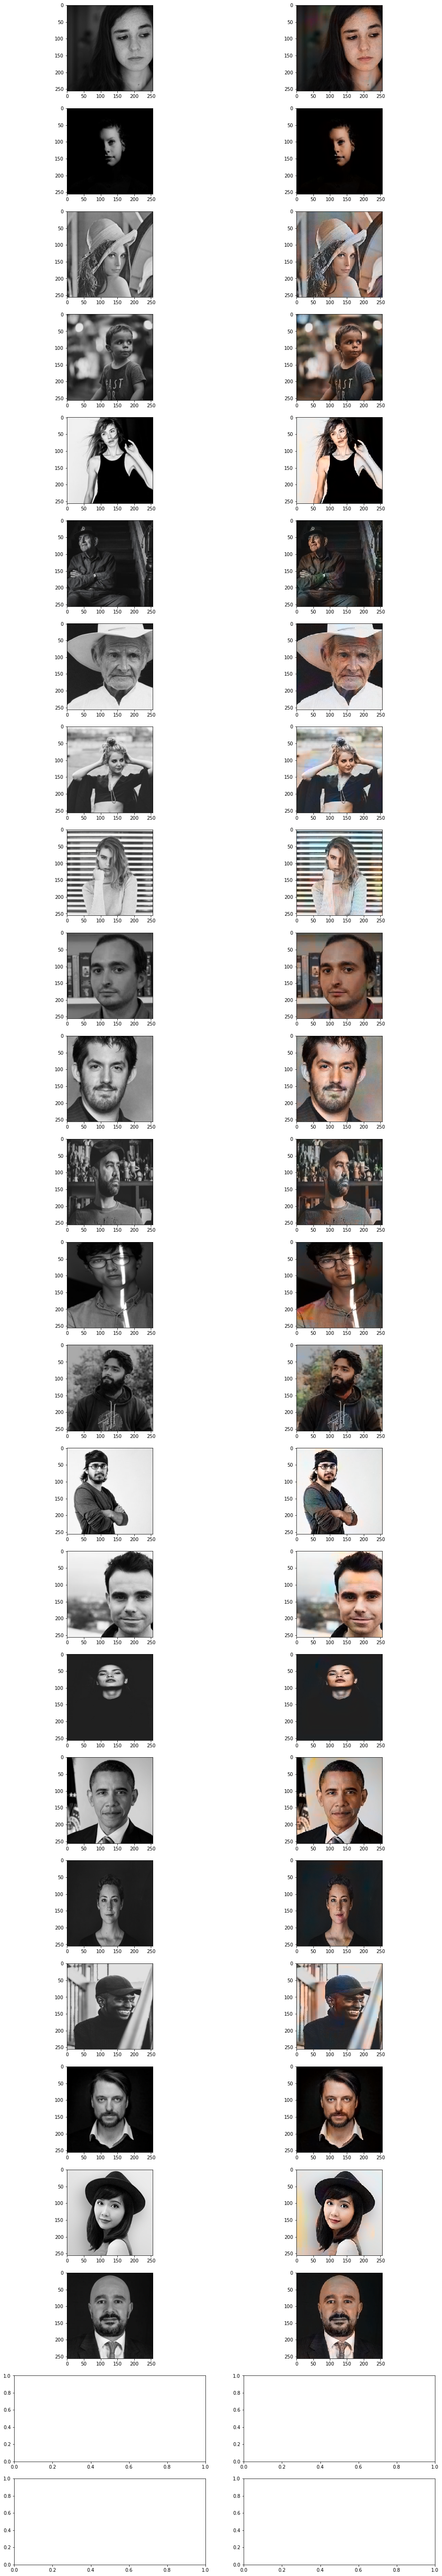

In [34]:
# Manual Testing of Images

import cv2
import os
%matplotlib inline 
from matplotlib import pyplot as plt

fig, ax = plt.subplots(25, 2, figsize=(16,100))
row = 0
colorize = []
print('Output of the Model')
for filename in os.listdir(PATH_TEST):
	colorize.append(img_to_array(load_img(os.path.join(PATH_TEST,filename))))
	ax[row,0].imshow(load_img(os.path.join(PATH_TEST,filename), interpolation='nearest'))
	row +=1

colorize = np.array(colorize, dtype=float)
colorize = rgb2lab(1.0/255*colorize)[:,:,:,0]
colorize = colorize.reshape(colorize.shape+(1,))


# Test model
output = loaded_model.predict(colorize)
output = output * 128

row = 0

# Output colorizations
for i in range(len(output)):
	cur = np.zeros((256, 256, 3))
	cur[:,:,0] = colorize[i][:,:,0]
	cur[:,:,1:] = output[i]
	resImage = lab2rgb(cur)
	ax[row,1].imshow(resImage, interpolation='nearest')
	row +=1
    

# 	imsave("result/img_"+str(i)+".png", resImage)
    
    